In [1]:
!pip install make-spirals

# Support Vector Machines (SVM)
 
## LinearSVC
 
Las Máquinas de Vectores Soporte (*Support Vector Machines*) realizan la clasificación encontrando el hiperplano que maximiza el margen entre las clases presentes en un conjunto de datos. Este concepto, que de entrada puede parecer confuso, es en realidad una idea bastante intuitiva y viene descrita por la siguiente figura:
 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1280px-SVM_margin.png" width=500>
 
En ella podemos observar claramente un conjunto de datos compuesto por 19 muestras (número de puntos) descritas por dos características ($x_1$ y $x_2$) que se clasifican en dos clases (azul y verde). El objetivo de cualquier clasificador es encontrar un hiperplano que separe todo el espacio en 2 de tal modo que las muestras de la clase azul queden a un lado de dicho hiperplano y las muestras de la clase verde queden al lado contrario.
 
Existen, por tanto, infinitos hiperplanos que son capaces de realizar esta división sin dejar ninguna muestra mal clasificada. Cuando utilizamos *SVM* lo que haremos será fijar este hiperplano como aquel que tenga mayor margen, es decir, aquel que mantenga la mayor distancia con aquellas muestras que está más cerca de dicho hiperplano. A este hiperplano le denominaremos límite de decisión (*decision boundary*).
 
Esta idea tan básica nos proporciona la definición de **vectores soporte** (*support vectors*) que dan nombre al método. Un vector soporte será aquella muestra que está incorrectamente clasificada o que se encuentra cerca del límite de decisión. En la figura anterior observamos 3 vectores soporte: 2 azules y 1 verde.
 
Entendida la idea conceptual del clasificador, veamos como podemos formalizarla matemáticamente. No olvidemos que estamos trabajando con un problema de clasificación (por ahora lineal) por lo que la ecuación que define la salida de nuestro clasificador será de la forma:
 
$$
\hat{y}_i = b + \vec{w} \cdot \vec{x}_i = b + \sum_{j=1}^{n} w_j \cdot x_{i,j}
$$
 
Siendo $b$ y $\vec{w} = (w_1, w_2, \dots, w_n)$ los parámetros que el modelo debe aprender.
 
Las Maquinas de Vector Soporte realizan una clasificación binaria atendiendo al siguiente criterio:
 
- Si $\hat{y}_i = b + \vec{w} \cdot \vec{x}_i \geq 1$ la muestra pertenece a la clase 0.
- Si $\hat{y}_i = b + \vec{w} \cdot \vec{x}_i \leq -1$ la muestra pertenece a la clase 1.
 
Nótese que los identificadores *clase 0* y *clase 1* son meras etiquetas, nada tienen que ver con los valores límite de $1$ y $-1$ definidos por SVM.
 
Enlazando esto con la explicación conceptual del método y volviendo a la figura previamente presentada, entendemos que los vectores soporte de la clase 0 son los que verifican que $b + \vec{w} \cdot \vec{x}_i = 1$ mientras que los vectores soporte de la clase 1 son los que verifican que $b + \vec{w} \cdot \vec{x}_i = -1$. Identificaremos por tanto dos nuevos hiperplanos: el **hiperplano positivo** como aquel en el que se sitúan los vectores soporte de la clase 0 y el **hiperplano negativo** como aquel en el que se sitúan los vectores soporte de la clase 0.
 
Con dichos hiperplanos podemos encontrar el límite de decisión como aquel hiperplano que equidiste del hiperplano positivo y del hiperplano negativo. Para ello nos apoyaremos en el concepto de **margen** (*margin*) que se encarga de medir la distancia entre los hiperplanos positivo y negativo. El valor del margen vendrá definido por la siguiente ecuación:
 
$$
margin = \frac{2}{||\vec{w}||}
$$
 
Valor que obtenemos si situamos dos muestras $\vec{x}_1$ y $\vec{x}_2$ una en frente de otra sobre los hiperplanos positivo y negativo. Analíticamente:
 
$$
b + \vec{w} \cdot \vec{x}_1 = 1 
$$
 
$$
b + \vec{w} \cdot \vec{x}_2 = -1 
$$
 
$$
(b + \vec{w} \cdot \vec{x}_1) - (b + \vec{w} \cdot \vec{x}_2) = 1 - (-1)
$$
 
$$
\vec{w} \cdot (\vec{x}_1 - \vec{x}_2) = 2
$$
 
$$
margin = \vec{x}_1 - \vec{x}_2 = \frac{2}{||\vec{w}||}
$$
 
La clave del funcionamiento de las Máquinas de Vector Soporte, y su principal diferencia respecto a otros clasificadores lineales como la Regresión Logística, radica en el hecho de que únicamente los vectores soporte tienen impacto en el entrenamiento del modelo. Todas las muestras del conjunto de datos que no sean vectores soporte no condicionan la definición del límite de decisión.
 
Para lograr esto las Máquinas de Vector Soporte se construyen apoyándose en la función de pérdida *Hinge Loss* que podemos observar a continuación:

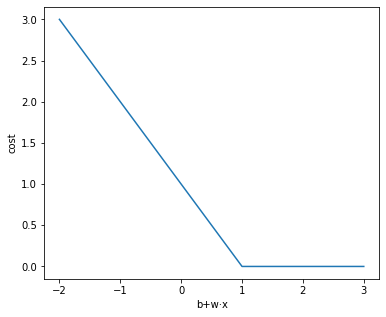

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot([-2, -1, 0, 1, 2, 3], [3, 2, 1, 0, 0, 0])
plt.xlabel("b+w·x")
plt.ylabel("cost")
plt.show()

A menudo, a esta función se le conoce como $cost$ y tiene por objetivo sancionar únicamente a las muestras que se encuentren mal clasificadas o muy cercanas al límite de decisión. Retomemos un concepto explicado anteriormente, si se verifica que $b + \vec{w} \cdot \vec{x}_i \geq 1$ entonces $\vec{x}_i$ pertenecerá a la clase 0. Asumiendo que la gráfica anterior hace referencia a la clase 0, todas las muestras con $b + \vec{w} \cdot \vec{x}_i \geq 1$ tendrán $cost = 0$. Dicho de otro modo, todas las muestras bien clasificadas tendrán $cost = 0$. Por el contrario, a medida que nos alejamos del hiperplano positivo ($b + \vec{w} \cdot \vec{x}_i = 1$) y nos acercamos al límite de decisión ($b + \vec{w} \cdot \vec{x}_i = 0$) el valor de $cost$ aumenta.
 
Entendida esta idea es evidente que necesitaremos contra función $cost$ para la clase 1, quedando definidas por tanto $cost_0$ y $cost_1$ del siguiente modo:

Text(0, 0.5, 'cost_1')

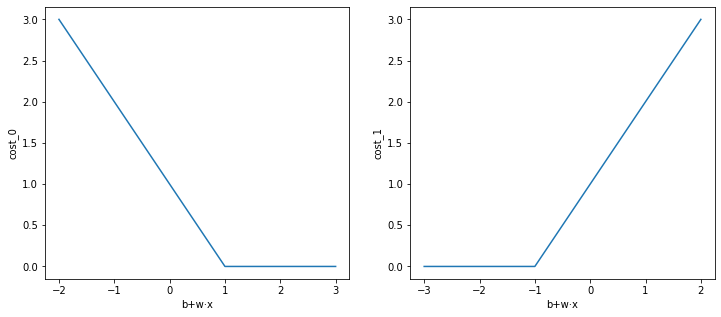

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(12, 5))

axs[0].plot([-2, -1, 0, 1, 2, 3], [3, 2, 1, 0, 0, 0])
axs[0].set_xlabel("b+w·x")
axs[0].set_ylabel("cost_0")

axs[1].plot([-3, -2, -1, 0, 1, 2], [0, 0, 0, 1, 2, 3])
axs[1].set_xlabel("b+w·x")
axs[1].set_ylabel("cost_1")

Matemáticamente podemos definir las funciones anteriores con las siguientes expresiones:
 
$$
\hat{y}_i = b + \vec{w} \cdot \vec{x}_i
$$
 
$$
cost_0(\hat{y}_i) = max(0, 1 - \hat{y}_i)
$$
 
$$
cost_1(\hat{y}_i) = max(0, 1 + \hat{y}_i)
$$
 
Y unificarlas del siguiente modo:
 
$$
cost(\hat{y}_i) = y_i \cdot cost_1(\hat{y}_i) + (1 - y_i) \cdot cost_0(\hat{y}_i)
$$
 
$$
cost(\hat{y}_i) = y_i \cdot max(0, 1 + \hat{y}_i) + (1 - y_i) \cdot max(0, 1 - \hat{y}_i)
$$
 
Si tenemos en cuenta los datos de entrada obtenemos:
 
$$
cost(\vec{x}_i) = y_i \cdot max(0, 1 + b + \vec{w} \cdot \vec{x}_i) + (1 - y_i) \cdot max(0, 1 - b - \vec{w} \cdot \vec{x}_i)
$$
 
Y finalmente podemos definir la **función de coste** de las máquinas de vector soporte añadiendo un término de regularización como:
 
$$
loss = C \left[ \sum_{i=1}^{m} y_i \cdot max(0, 1 + b + \vec{w} \cdot \vec{x}_i) + (1 - y_i) \cdot max(0, 1 - b - \vec{w} \cdot \vec{x}_i) \right] + \frac{1}{2} \sum_{j=1}^{n} w_j^2
$$
 
Donde $m$ representa el número de muestras y $n$ el número de características o *features*. Observamos, además, que se ha añadido un híper-parámetros $C$ al modelo. $C$, al que podemos llamar no-regularización, permite controlar el proceso de aprendizaje: valores grandes de $C$ harán el modelo muy sensible a los *outlayers* mientras que valores bajos de $C$ harán el método muy generalista.

Las Máquinas de Vector Soporte (lineales) se encuentra definidas en `sklearn` en la clase [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Como se observa en su documenta, la clase dispone de un parámetro `C` que se corresponde con el híper-parámetro $C$ que controla la no-regularización.
 
Una vez ajustado el modelo podemos recuperar sus parámetros accediendo a sus atributos `coef_`(que contiene $\vec{w}$) e `intercep_`(que contiene $b$).
 
Veamos un ejemplo.
 
Supongamos el siguiente conjunto de datos:

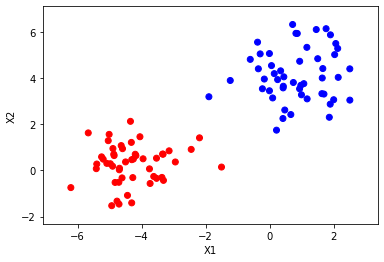

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=3)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

Ajustemos un modelo mediante `LinearSVC`:

In [5]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
print("coef_ = " + str(linear_svm.coef_))
print("intercept_ = " + str(linear_svm.intercept_))

coef_ = [[-0.6161594  -0.66145929]]
intercept_ = [0.20896127]


Y lo pintamos:

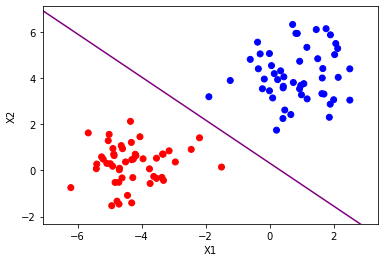

In [6]:
import numpy as np

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)

line = np.linspace(min[0], max[0])
plt.plot(line,  -(line * linear_svm.coef_[0][0] + linear_svm.intercept_) / linear_svm.coef_[0][1], c='purple')

La clase `LinearSVC` que hemos utilizado es, aproximadamente, equivalente a la clase [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) definiendo el parámetro `kernel='linear'`.Estudiaremos esto más adelante, sin embargo, ahora vamos a hacer uso de la clase `SVC` en lugar de `LinearSVC` para poder representar los vectores soporte.

La clase `SVC` tiene un atributo `support_vectors_` que contienen los vectores soporte utilizados para definir el límite de decisión. Veamos dichos puntos con un ejemplo gráfico:

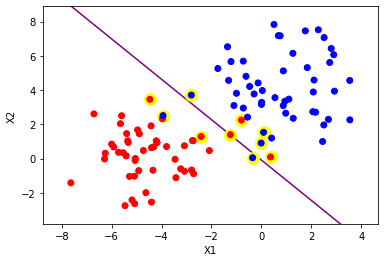

In [7]:
from sklearn import svm

cluster_std = 1.7  #@param {type: "slider", min: 0.1, max: 2, step: 0.1}

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=cluster_std, random_state=3)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr, zorder=15)

svc = svm.SVC(kernel='linear').fit(X, y)

line = np.linspace(min[0], max[0])
plt.plot(line, -(line * svc.coef_[0][0] + svc.intercept_) / svc.coef_[0][1], color='purple')

plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], marker='o', color='yellow', s=140, zorder=10)

La explicación anterior hacer se ha centrado en detallar cómo funcionan las máquinas de vectores soporte para clasificación binaria. No obstante, también se pueden emplear para clasificación multiclase. La única diferencia es que en lugar de realizar una única clasificación binaria haremos tantas clasificaciones binarias como clases haya utilizando la estrategia *one-vs-rest* (también llamada *one-vs-all*). Esta estrategia asume que todas las muestras que no pertenecen a la clase evaluada son de la clase contraria.

Ilustremos el resultado con un ejemplo.

Generamos un conjunto de datos con tres clases:

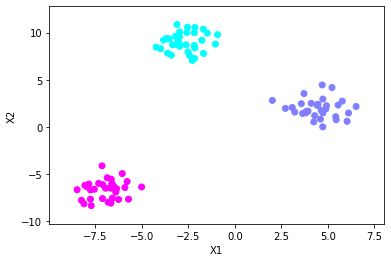

In [8]:
X, y = make_blobs(centers=3, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)

Ajustamos el modelo:

In [9]:
linear_svm = LinearSVC().fit(X, y)
print("coef_ = " + str(linear_svm.coef_))
print("intercept_ = " + str(linear_svm.intercept_))

coef_ = [[-0.17492452  0.23140896]
 [ 0.4762156  -0.06936511]
 [-0.18914124 -0.20400646]]
intercept_ = [-1.07745452  0.13140847 -0.0860501 ]


Analizamos el resultado:

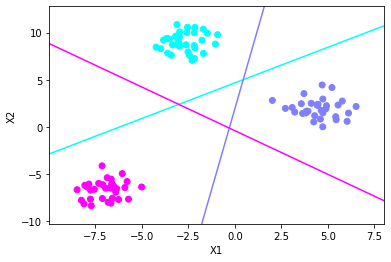

In [10]:
plt.figure()

plt.xlim(min[0], max[0])
plt.ylim(min[1], max[1])

plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.cool)

line = np.linspace(min[0], max[0])

plt.plot(line, -(line * linear_svm.coef_[0][0] + linear_svm.intercept_[0]) / linear_svm.coef_[0][1], color=plt.cm.cool(0.0))
plt.plot(line, -(line * linear_svm.coef_[1][0] + linear_svm.intercept_[1]) / linear_svm.coef_[1][1], color=plt.cm.cool(0.5))
plt.plot(line, -(line * linear_svm.coef_[2][0] + linear_svm.intercept_[2]) / linear_svm.coef_[2][1], color=plt.cm.cool(1.0))

## Non-linear SVM
 
En el apartado anterior hemos visto cómo podemos construir una Máquina de Vectores Soporte que separe clases linealmente. Sin embargo, existen infinidad de problemas en los que la separación lineal no es posible. Las Máquinas de Vectores Soporte pueden funcionar con separaciones no lineales haciendo algunas modificaciones.
 
Principalmente debemos modificar la función de coste por una nueva:
 
$$
loss = C \left[ \sum_{i=1}^{m} y_i \cdot max(0, 1 + \theta^T \cdot f(\vec{x}_i)) + (1 - y_i) \cdot max(0, 1 - \theta^T \cdot f(\vec{x}_i)) \right] + \frac{1}{2} \sum_{j=1}^{n} \theta_j^2
$$
 
Como vemos hemos modificado los vectores $\vec{w}$ por matrices $\theta$ y a los valores de los vectores $\vec{x}_i$ se les ha aplicado una función $f$.
 
Está función $f$ se denomina **función de Kernel** y permite determinar la similaridad entre una muestra y todas las demás. Si dos muestras son idénticas entonces su similaridad deberá ser 1, mientras que si son opuestas deberá ser 0. Una de las funciones de Kernel más populares es la ***Gaussian Kernel***, que se encuentra implementada en `sklearn` bajo el acrónimo `'rbf'` (*Radial Basis Fuction Kernel*). Esta función determina la distancia euclídea entre dos vectores suavizándose mediante una distribución normal de desviación típica $\sigma$:
 
$$
similarity(x_1, x_2) = exp\left( \frac{||x_1 - x_2||^2}{2\sigma^2} \right)
$$
 
Con este ajuste $f(\vec{x}_i)$ devolverá un vector con la distancia de la muestra $i$ con respecto a todas las demás. Intuitivamente, las muestras cercanas a $i$ tendrán valores próximos a 1 y las muestras lejanas tendrá valores próximos a 0.
 
Por consiguiente, $\theta$ pasará a ser una matriz cuadrada de orden $m$ (número de muestras) con los parámetros que el modelo debe aprender.


Este clasificador se encuentra implementado en la clase [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) de la librería `sklearn`.
 
Se destacan dos parámetros tres parámetros de su implementación:
 
- `C` que indica la no-regularización como en `LinearSVC`.
- `Kernel` que permite modificar la función de Kernel. Por defecto `'rbf'`.
- `gamma` que modifica los parámetros de la función de Kernel. En el caso de `'rbf'`, valores altos de `gamma` indican una baja desviación típica y, por tanto, prestar más atención a las muestras más cercanas, mientras que valores bajos de `gamma` indican lo apuesto.
 
Analicemos la importancia de estos parámetros con un ejemplo gráfico:
 

<ipython-input-11-2f98ff36b72f>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-11-2f98ff36b72f>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-11-2f98ff36b72f>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either speci

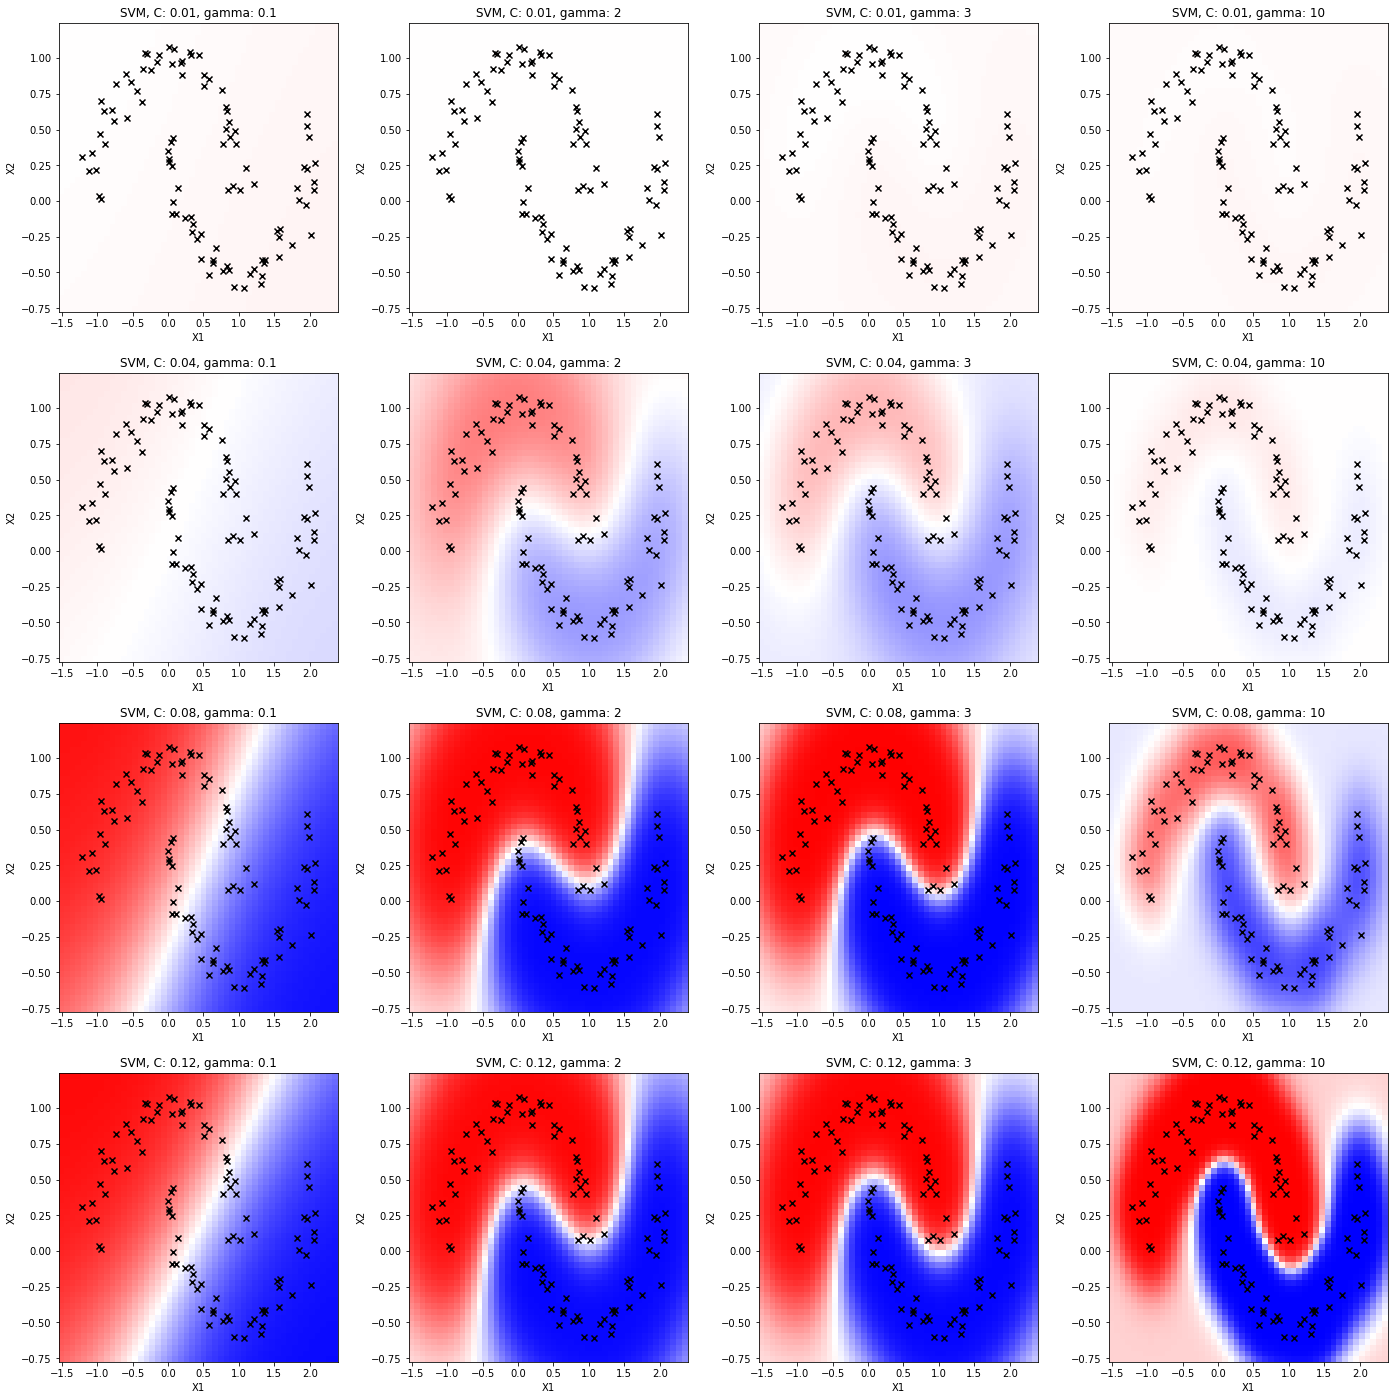

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import numpy as np  

X, y = make_moons(n_samples=100, noise=0.08, random_state=10)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, axs = plt.subplots(4,4, figsize=(20,20))
fig.tight_layout(pad=4.0)

for i, C in enumerate([0.01, 0.04, 0.08, 0.12]):
  for j, gamma in enumerate([0.1,2,3,10]):
    
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C, probability=True)
    clf.fit(X, y)

    axs[i,j].set_title('SVM, C: ' + format(C) + ', gamma: '+ str(gamma))

    axs[i,j].set_xlabel('X1')
    axs[i,j].set_ylabel('X2')

    axs[i,j].set_xlim(min[0], max[0])
    axs[i,j].set_ylim(min[1], max[1])

    x1, x2 = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
    proba = clf.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,0]
    proba = proba.reshape(x1.shape)
    axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)

    axs[i,j].scatter(X[:,0], X[:,1], c='k', marker='x')

<ipython-input-14-ee3fddc3e67d>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-14-ee3fddc3e67d>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-14-ee3fddc3e67d>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either speci

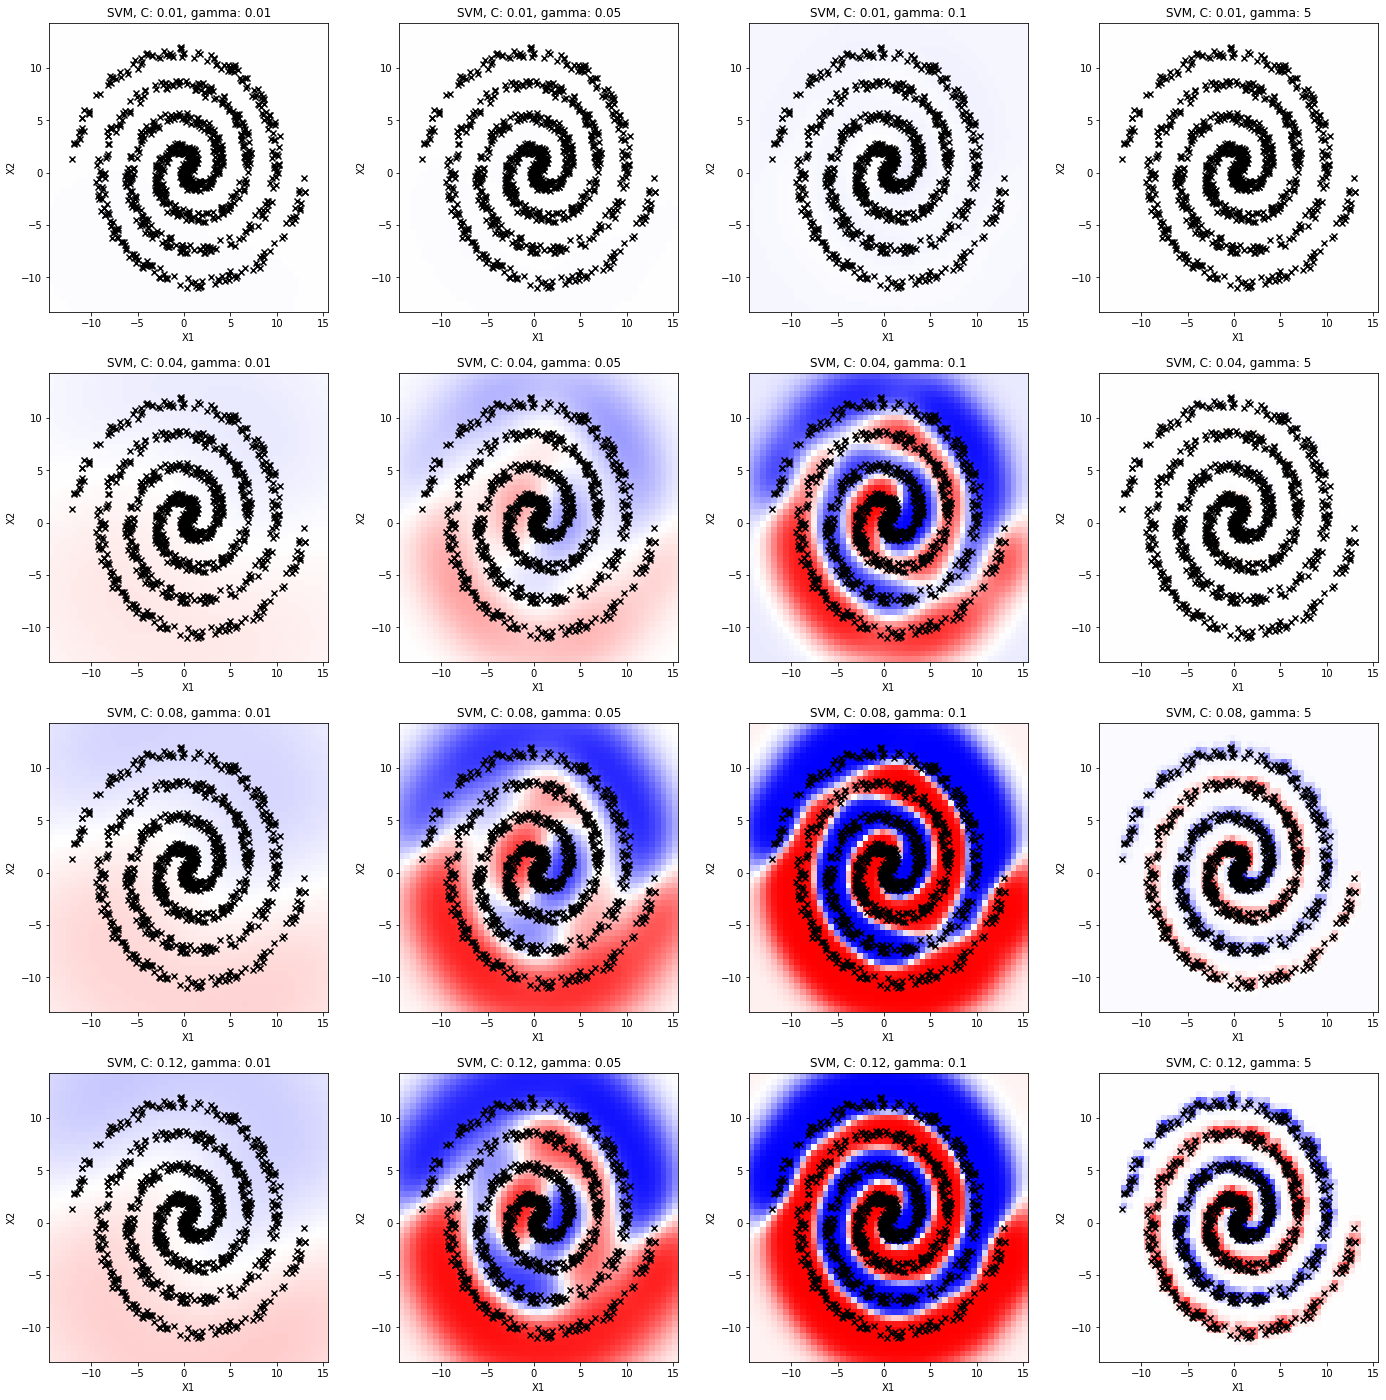

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from make_spirals import make_spirals
import numpy as np  

X, y = make_spirals(n_samples=1000, random_state=10)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, axs = plt.subplots(4,4, figsize=(20,20))
fig.tight_layout(pad=4.0)

for i, C in enumerate([0.01, 0.04, 0.08, 0.12]):
  for j, gamma in enumerate([0.01,0.05,0.1,5]):
    
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C, probability=True)
    clf.fit(X, y)

    axs[i,j].set_title('SVM, C: ' + format(C) + ', gamma: '+ str(gamma))

    axs[i,j].set_xlabel('X1')
    axs[i,j].set_ylabel('X2')

    axs[i,j].set_xlim(min[0], max[0])
    axs[i,j].set_ylim(min[1], max[1])

    x1, x2 = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
    proba = clf.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,0]
    proba = proba.reshape(x1.shape)
    axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)

    axs[i,j].scatter(X[:,0], X[:,1], c='k', marker='x')

<ipython-input-20-db408dec7be5>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-20-db408dec7be5>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)
<ipython-input-20-db408dec7be5>:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either speci

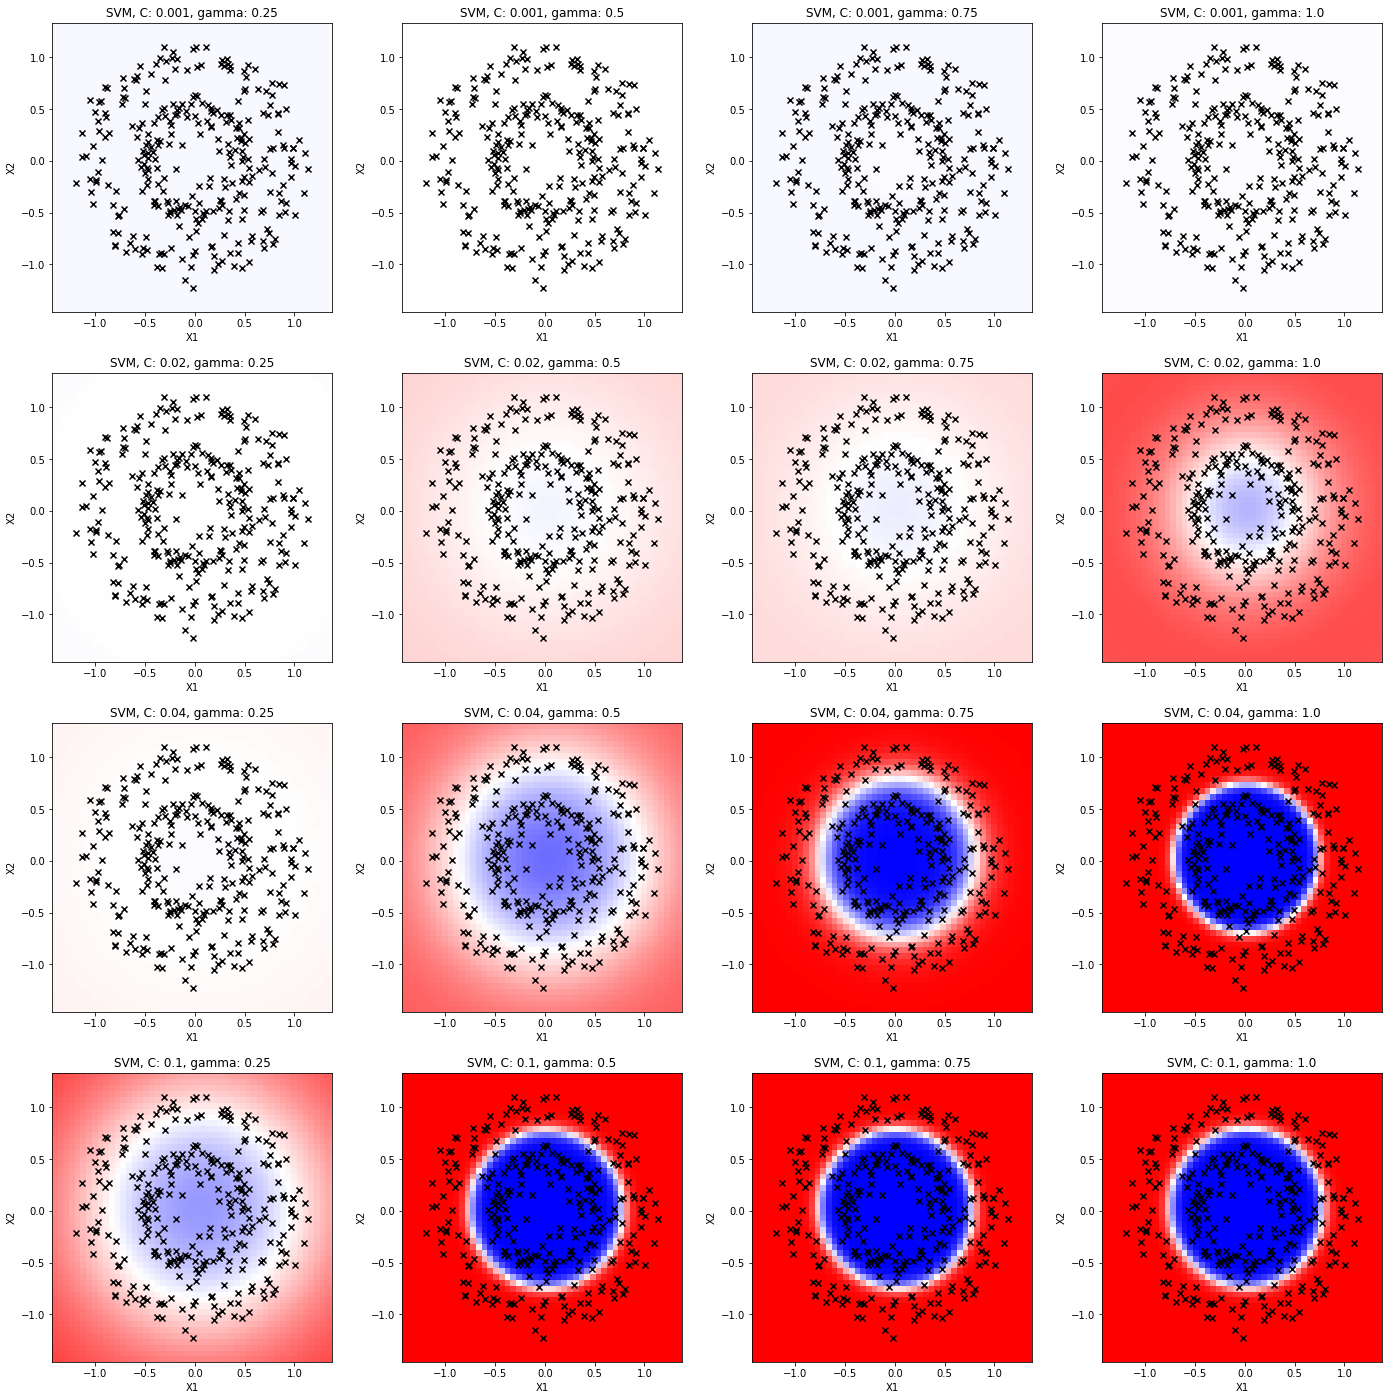

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_circles
from sklearn import svm
import numpy as np  

X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

min = np.amin(X, axis=0)
max = np.amax(X, axis=0)

diff = max - min

min = min - 0.1 * diff
max = max + 0.1 * diff

fig, axs = plt.subplots(4,4, figsize=(20,20))
fig.tight_layout(pad=4.0)

for i, C in enumerate([0.001, 0.02, 0.04, 0.10]):
  for j, gamma in enumerate([0.25,0.50,0.75,1.00]):
    
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C, probability=True)
    clf.fit(X, y)

    axs[i,j].set_title('SVM, C: ' + format(C) + ', gamma: '+ str(gamma))

    axs[i,j].set_xlabel('X1')
    axs[i,j].set_ylabel('X2')

    axs[i,j].set_xlim(min[0], max[0])
    axs[i,j].set_ylim(min[1], max[1])

    x1, x2 = np.meshgrid(np.linspace(min[0], max[0]), np.linspace(min[1], max[1]))
    proba = clf.predict_proba(np.c_[x1.ravel(), x2.ravel()])[:,0]
    proba = proba.reshape(x1.shape)
    axs[i,j].pcolormesh(x1, x2, proba, cmap=plt.cm.bwr, vmin=0, vmax=1)

    axs[i,j].scatter(X[:,0], X[:,1], c='k', marker='x')

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">